In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('ad_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

   Ad ID        ad_type Product/Service Name          category  \
0      1  Product-Based        Home Security          Security   
1      2  Service-Based               Laptop  Health & Fitness   
2      3  Service-Based               Laptop   Food & Beverage   
3      4  Service-Based        Home Security     Entertainment   
4      5  Service-Based        Home Security         Education   

  target_audience      platform  Impressions  Clicks  Conversions  ad_spend  \
0   Professionals            TV        12634    5707          371   3163.92   
1           Teens  Social Media        37623    8220          734   2171.18   
2           Teens         Radio        30233    9719          925   3755.63   
3           Teens        Online        13182    1121          961   5061.41   
4   Professionals     Billboard        18486    4143          465   1833.91   

    Revenue  ad_duration     Location              Date  
0   7460.85            9     New York  01-01-2024 00:00  
1  27860.60 

In [3]:
# Drop unnecessary columns (e.g., 'CTR') from the dataset
data = data.drop(columns=['CTR'], errors='ignore')

# Handle missing values (if any)
data = data.dropna()

In [4]:
# Feature-target split
# Assuming 'Revenue' is the target variable for optimization
X = data.drop(columns=['Revenue'])  # Features
y = data['Revenue']  # Target

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [5]:
# Preprocessing: OneHotEncode categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Define the model (RandomForestRegressor as an example)
model = RandomForestRegressor(random_state=42)

# Create a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipeline.predict(X_test)

# Display the first 5 predictions
print("Predicted Revenue (first 5):", predictions[:5])

# Feature importance plot
# Extract feature importance from the trained RandomForestRegressor
feature_importances = pipeline.named_steps['model'].feature_importances_

# Get feature names (after one-hot encoding)
feature_names = numerical_cols.tolist() + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))

Predicted Revenue (first 5): [27694.1649 25961.6928 26826.8694 25102.2857 23183.1702]


In [6]:
import itertools
import pandas as pd

def optimize_ads(data, model):
    # Ensure that 'platform' and 'ad_type' columns exist
    platforms = data['platform'].unique()  # Get unique values of platform
    ad_types = data['ad_type'].unique()     # Get unique values of ad_type

    # Create all possible combinations of platforms and ad types
    combinations = list(itertools.product(platforms, ad_types))

    # List to store the predicted revenue for each combination
    optimized_results = []

    for combo in combinations:
        # Create a DataFrame with the combination of features
        optimized_data = data.copy()
        optimized_data['platform'] = combo[0]  # Assign the current platform
        optimized_data['ad_type'] = combo[1]   # Assign the current ad_type

        # Ensure that all other columns remain the same (except for 'Revenue' which we don't predict)
        optimized_data = optimized_data.drop(columns='Revenue')  # Drop target column (if present)

        # Make predictions for this new data
        predicted_revenue = model.predict(optimized_data)

        # Calculate the sum of predicted revenues for this combination
        total_predicted_revenue = predicted_revenue.sum()

        # Store the result along with the feature combination
        optimized_results.append((combo, total_predicted_revenue))

    # Sort the results by predicted revenue in descending order
    optimized_results.sort(key=lambda x: x[1], reverse=True)

    # Return the top 5 ad strategies (platform, ad_type, and predicted revenue)
    top_5_optimized = optimized_results[:5]

    return top_5_optimized

# Example usage:
optimized_ads = optimize_ads(data, pipeline)
print("Top 5 Optimized Ads Strategies:")
for strategy, revenue in optimized_ads:
    print(f"Platform: {strategy[0]}, Ad Type: {strategy[1]} - Predicted Total Revenue: {revenue}")


Top 5 Optimized Ads Strategies:
Platform: Online, Ad Type: Product-Based - Predicted Total Revenue: 259500855.41860002
Platform: Billboard, Ad Type: Product-Based - Predicted Total Revenue: 259038181.92829996
Platform: Radio, Ad Type: Product-Based - Predicted Total Revenue: 258679843.2378
Platform: Print Media, Ad Type: Product-Based - Predicted Total Revenue: 258068584.01889998
Platform: Social Media, Ad Type: Product-Based - Predicted Total Revenue: 256710305.69959998


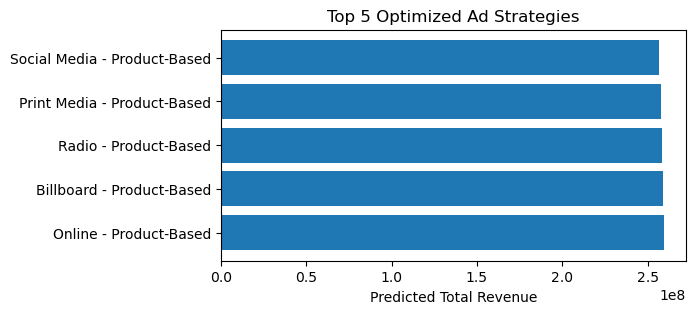

In [7]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

def optimize_ads(data, model):
    # Ensure that 'platform' and 'ad_type' columns exist
    platforms = data['platform'].unique()  # Get unique values of platform
    ad_types = data['ad_type'].unique()     # Get unique values of ad_type

    # Create all possible combinations of platforms and ad types
    combinations = list(itertools.product(platforms, ad_types))

    # List to store the predicted revenue for each combination
    optimized_results = []

    for combo in combinations:
        # Create a DataFrame with the combination of features
        optimized_data = data.copy()
        optimized_data['platform'] = combo[0]  # Assign the current platform
        optimized_data['ad_type'] = combo[1]   # Assign the current ad_type

        # Ensure that all other columns remain the same (except for 'Revenue' which we don't predict)
        optimized_data = optimized_data.drop(columns='Revenue')  # Drop target column (if present)

        # Make predictions for this new data
        predicted_revenue = model.predict(optimized_data)

        # Calculate the sum of predicted revenues for this combination
        total_predicted_revenue = predicted_revenue.sum()

        # Store the result along with the feature combination
        optimized_results.append((combo, total_predicted_revenue))

    # Sort the results by predicted revenue in descending order
    optimized_results.sort(key=lambda x: x[1], reverse=True)

    # Return the top 5 ad strategies (platform, ad_type, and predicted revenue)
    top_5_optimized = optimized_results[:5]

    return top_5_optimized

# Example usage:
optimized_ads = optimize_ads(data, pipeline)

# Prepare data for plotting
ad_strategies = [f"{strategy[0]} - {strategy[1]}" for strategy, _ in optimized_ads]
revenues = [revenue for _, revenue in optimized_ads]

# Plot the top 5 ad strategies
plt.figure(figsize=(6, 3))
plt.barh(ad_strategies, revenues)
plt.xlabel('Predicted Total Revenue')
plt.title('Top 5 Optimized Ad Strategies')
plt.show()


In [8]:
def recommend_ads(data, model, top_n=5):
    # Get predicted revenue for all ads in the dataset
    predictions = model.predict(data.drop(columns='Revenue'))

    # Create a DataFrame with relevant fields and predicted revenues
    recommendations = pd.DataFrame({
        'Ad ID': data['Ad ID'],
        'Product/Service Name': data['Product/Service Name'],
        'Category': data['category'],
        'Target Audience': data['target_audience'],
        'Platform': data['platform'],
        'Impressions': data['Impressions'],
        'Predicted_Revenue': predictions
    })

    # Sort by predicted revenue in descending order
    recommendations = recommendations.sort_values(by='Predicted_Revenue', ascending=False)

    # Return the top N recommended ads
    return recommendations.head(top_n)

# Example usage: Recommend the top 5 ads
recommended_ads = recommend_ads(data, pipeline, top_n=5)
print("Top 5 Recommended Ads:")
print(recommended_ads)


Top 5 Recommended Ads:
      Ad ID Product/Service Name         Category Target Audience  \
2090   2091           Smartphone    Entertainment        Students   
1656   1657            Insurance          Finance           Teens   
4373   4374       Travel Package           Travel        Families   
5654   5655   Fitness Membership  Food & Beverage        Families   
939     940        Home Security      Electronics        Students   

          Platform  Impressions  Predicted_Revenue  
2090  Social Media        41340         43955.7990  
1656     Billboard        26592         43730.2964  
4373  Social Media        10729         43687.0281  
5654        Online        24170         43586.8214  
939          Radio        13195         43472.4296  
